In [1]:
#Import the requests library
import requests

#Import the API key
from config import weather_api_key

#Import the datetime module from the datetime library
from datetime import datetime

# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import textwrap

In [2]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [3]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=ff3ead26fa733ab5a792ef6f3221a1ed


In [4]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [5]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [6]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

cockburn town tc
gat ly
parvatsar in
punta arenas cl
saint george bm


In [7]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [8]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

627

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [10]:
# Loop through all the cities in our list.
for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + cities[i]

In [11]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 13 | thompson
Processing Record 2 of Set 13 | hamilton
Processing Record 3 of Set 13 | georgetown
Processing Record 4 of Set 13 | atuona
Processing Record 5 of Set 13 | sucre
Processing Record 6 of Set 13 | albany
Processing Record 7 of Set 13 | bethel
Processing Record 8 of Set 13 | castro
Processing Record 9 of Set 13 | magadan
Processing Record 10 of Set 13 | koslan
Processing Record 11 of Set 13 | broken hill
Processing Record 12 of Set 13 | hobart
Processing Record 13 of Set 13 | paamiut
Processing Record 14 of Set 13 | luocheng
Processing Record 15 of Set 13 | manturovo
Processing Record 16 of Set 13 | bolungarvik
City not found. Skipping...
Processing Record 17 of Set 13 | punta arenas
Processing Record 18 of Set 13 | kapaa
Processing Record 19 of Set 13 | kavieng
Processing Record 20 of Set 13 | vaini
Processing Record 21 of Set 13 | taoudenni
Processing Record 22 of Set 13 | along
Processing Record 23 of Set 13 | saldanha
Processing Record 24 of Set 

Processing Record 37 of Set 16 | kenai
Processing Record 38 of Set 16 | kamenskoye
City not found. Skipping...
Processing Record 39 of Set 16 | jalingo
Processing Record 40 of Set 16 | huarmey
Processing Record 41 of Set 16 | samarai
Processing Record 42 of Set 16 | marzuq
Processing Record 43 of Set 16 | kodiak
Processing Record 44 of Set 16 | nouakchott
Processing Record 45 of Set 16 | trinidad
Processing Record 46 of Set 16 | iquique
Processing Record 47 of Set 16 | hailey
Processing Record 48 of Set 16 | uarini
Processing Record 49 of Set 16 | port blair
Processing Record 50 of Set 16 | yumbe
Processing Record 1 of Set 17 | nanortalik
Processing Record 2 of Set 17 | attawapiskat
City not found. Skipping...
Processing Record 3 of Set 17 | los llanos de aridane
Processing Record 4 of Set 17 | alice springs
Processing Record 5 of Set 17 | kudahuvadhoo
Processing Record 6 of Set 17 | waipawa
Processing Record 7 of Set 17 | santa helena de goias
Processing Record 8 of Set 17 | mossendjo

Processing Record 22 of Set 20 | valleyview
Processing Record 23 of Set 20 | maumere
Processing Record 24 of Set 20 | portland
Processing Record 25 of Set 20 | santa margherita ligure
Processing Record 26 of Set 20 | alvaraes
Processing Record 27 of Set 20 | acarau
Processing Record 28 of Set 20 | faya
Processing Record 29 of Set 20 | tromso
Processing Record 30 of Set 20 | olinda
Processing Record 31 of Set 20 | nemuro
Processing Record 32 of Set 20 | jaleswar
Processing Record 33 of Set 20 | meulaboh
Processing Record 34 of Set 20 | ussel
Processing Record 35 of Set 20 | ribeira grande
Processing Record 36 of Set 20 | lambarene
Processing Record 37 of Set 20 | jutai
Processing Record 38 of Set 20 | boa vista
Processing Record 39 of Set 20 | balabac
Processing Record 40 of Set 20 | sogdiondon
City not found. Skipping...
Processing Record 41 of Set 20 | ferme-neuve
Processing Record 42 of Set 20 | sutto
Processing Record 43 of Set 20 | pauini
Processing Record 44 of Set 20 | pemangkat


City not found. Skipping...
Processing Record 9 of Set 24 | bagdarin
Processing Record 10 of Set 24 | fort nelson
Processing Record 11 of Set 24 | tynda
Processing Record 12 of Set 24 | rio grande
Processing Record 13 of Set 24 | beisfjord
Processing Record 14 of Set 24 | umzimvubu
City not found. Skipping...
Processing Record 15 of Set 24 | zhezkazgan
Processing Record 16 of Set 24 | yatou
Processing Record 17 of Set 24 | davydivka
Processing Record 18 of Set 24 | egvekinot
Processing Record 19 of Set 24 | nizwa
Processing Record 20 of Set 24 | petropavlovsk-kamchatskiy
Processing Record 21 of Set 24 | koumac
Processing Record 22 of Set 24 | taltal
Processing Record 23 of Set 24 | adrar
Processing Record 24 of Set 24 | prado
Processing Record 25 of Set 24 | piopio
Processing Record 26 of Set 24 | bendigo
Processing Record 27 of Set 24 | ballina
Processing Record 28 of Set 24 | okato
Processing Record 29 of Set 24 | calama
Processing Record 30 of Set 24 | swanton
Processing Record 31 o

In [13]:
len(city_data)

580

In [14]:
#Convert the array of ddictionaries to a Pandas DataFraame 
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Thompson,55.74,-97.86,-9.40,83,90,8.05,CA,2020-12-24 21:45:01
1,Hamilton,39.18,-84.53,26.01,73,90,13.87,US,2020-12-24 21:43:53
2,Georgetown,5.41,100.34,77.00,88,20,2.24,MY,2020-12-24 21:45:54
3,Atuona,-9.80,-139.03,78.89,78,11,12.53,PF,2020-12-24 21:45:54
4,Sucre,-19.03,-65.26,66.20,48,40,14.99,BO,2020-12-24 21:41:16
5,Albany,42.60,-73.97,48.99,87,100,12.03,US,2020-12-24 21:45:54
6,Bethel,41.37,-73.41,53.01,87,90,5.82,US,2020-12-24 21:41:21
7,Castro,-24.79,-50.01,66.02,86,49,10.13,BR,2020-12-24 21:45:55
8,Magadan,59.57,150.80,-18.13,80,35,11.81,RU,2020-12-24 21:45:55
9,Koslan,63.46,48.90,-4.83,90,100,9.04,RU,2020-12-24 21:45:55


In [15]:
new_city_column =["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_city_column]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2020-12-24 21:45:01,55.74,-97.86,-9.40,83,90,8.05
1,Hamilton,US,2020-12-24 21:43:53,39.18,-84.53,26.01,73,90,13.87
2,Georgetown,MY,2020-12-24 21:45:54,5.41,100.34,77.00,88,20,2.24
3,Atuona,PF,2020-12-24 21:45:54,-9.80,-139.03,78.89,78,11,12.53
4,Sucre,BO,2020-12-24 21:41:16,-19.03,-65.26,66.20,48,40,14.99
5,Albany,US,2020-12-24 21:45:54,42.60,-73.97,48.99,87,100,12.03
6,Bethel,US,2020-12-24 21:41:21,41.37,-73.41,53.01,87,90,5.82
7,Castro,BR,2020-12-24 21:45:55,-24.79,-50.01,66.02,86,49,10.13
8,Magadan,RU,2020-12-24 21:45:55,59.57,150.80,-18.13,80,35,11.81
9,Koslan,RU,2020-12-24 21:45:55,63.46,48.90,-4.83,90,100,9.04


In [16]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [17]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [18]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1608846506.3648949

In [19]:
today = time.strftime("%x")
today

'12/24/20'

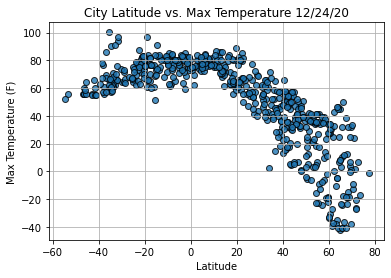

In [20]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

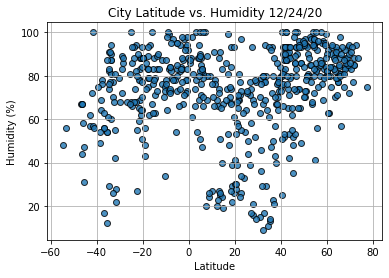

In [21]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

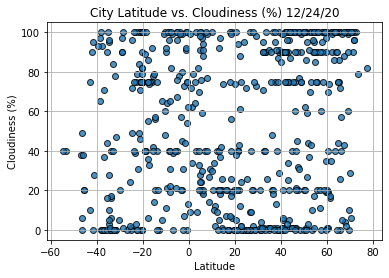

In [22]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

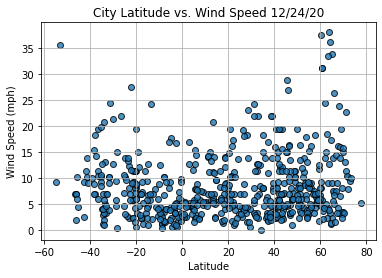

In [23]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [24]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [25]:
index13 = city_data_df.loc[13]
index13

City                     Luocheng
Country                        CN
Date          2020-12-24 21:45:56
Lat                         29.38
Lng                        104.03
Max Temp                    43.74
Humidity                       77
Cloudiness                     73
Wind Speed                   0.67
Name: 13, dtype: object

In [26]:
#Find cities that are in the nothern hemisphere in a list
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3      False
4      False
       ...  
575     True
576     True
577     True
578     True
579     True
Name: Lat, Length: 580, dtype: bool

In [27]:
#Another way to find cities that are in the northern hemisphere
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Thompson,CA,2020-12-24 21:45:01,55.74,-97.86,-9.40,83,90,8.05
1,Hamilton,US,2020-12-24 21:43:53,39.18,-84.53,26.01,73,90,13.87
2,Georgetown,MY,2020-12-24 21:45:54,5.41,100.34,77.00,88,20,2.24
5,Albany,US,2020-12-24 21:45:54,42.60,-73.97,48.99,87,100,12.03
6,Bethel,US,2020-12-24 21:41:21,41.37,-73.41,53.01,87,90,5.82


In [28]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

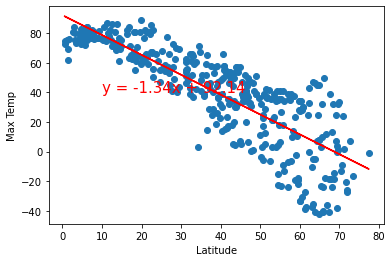

In [39]:
# Linear regression on the Northern Hemisphere-Max temp
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere for Maximum Temperature", 'Max Temp',(10,40))

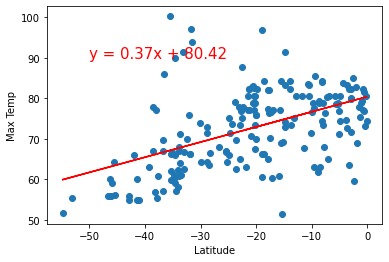

In [40]:
# Linear regression on the Southern Hemisphere-Max Temp
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

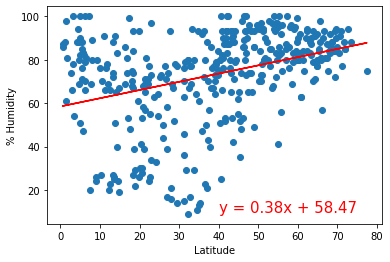

In [41]:
# Linear regression on the Northern Hemisphere-Humidity
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

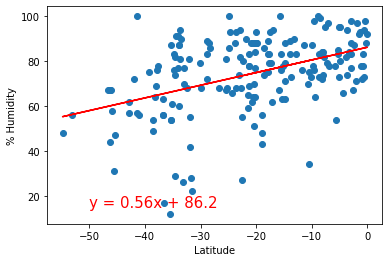

In [42]:
# Linear regression on the Southern Hemisphere- Humidity
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

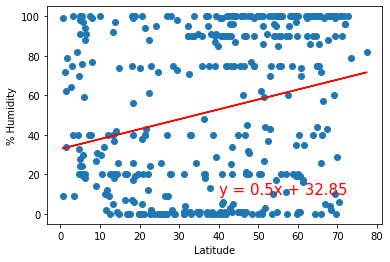

In [43]:
# Linear regression on the Northern Hemisphere-Cloudiness
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Humidity',(40, 10))

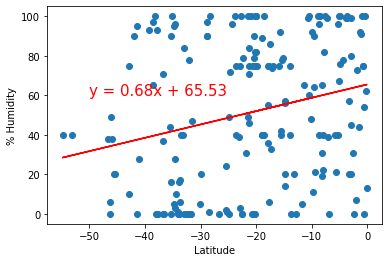

In [44]:
# Linear regression on the Southern Hemisphere- Cloudiness
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,60))

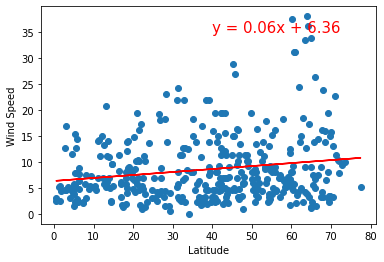

In [45]:
# Linear regression on the Northern Hemisphere-Wind Speed
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

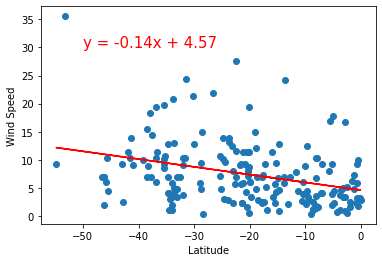

In [46]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,30))
